In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


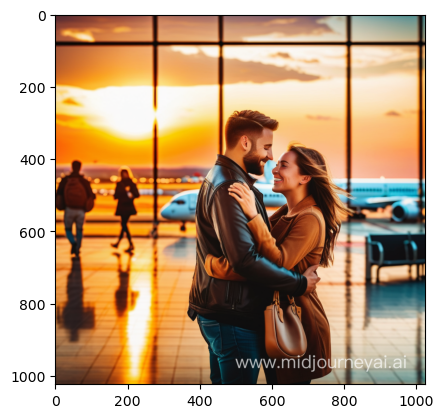

In [24]:
# image file_path
file_path = r"C:\Users\varsha\Pictures\Extra photos\en_app(5).png"

# load the image
img = cv2.imread(file_path)

# matplotlib loads image in BGR format, so lets convert it to RGB

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# view the image
plt.imshow(img_rgb)

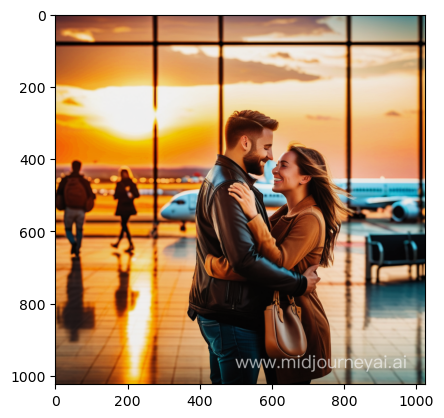

In [16]:
# Step 1: Brightness Adjustment

def get_brightness(value, img_rgb):
    # convert to HSV format -> shape -> (1024, 1024, 3)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    # split the pixel into h, s, v vectors -> shape (h/s/v) -> (1024, 1024)
    h, s, v = cv2.split(img_hsv)

    # add the brightness factor to the value vector of HSV image, whcih is responsible for intensity of the luminance
    v = cv2.add(v, value)


    # After adding the brightness factor to the value part, merge the 1D vectors to form a 3D array
    img_hsv = cv2.merge((h, s, v))

    # convert HSV type image to RGB
    img_bri = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    
    return img_bri

img_bri = get_brightness(-10, img_rgb)

# plot the image
plt.imshow(img_bri)


## --------------------------------------------------------------------------------------------------------

### Method 2: CLAHE (Contrast Limited Adaptive Histogram Equalization):

Similar to histogram equalization, but it limits the amplification of the contrast in regions with high local contrast to avoid over-amplification of noise.

For histogram equalization and contrast enhancement tasks, both LAB and YUV color spaces can be effective. LAB may be preferred when preserving color information and ensuring perceptual uniformity are important, while YUV may be preferred for tasks where efficient representation of brightness is the primary concern.

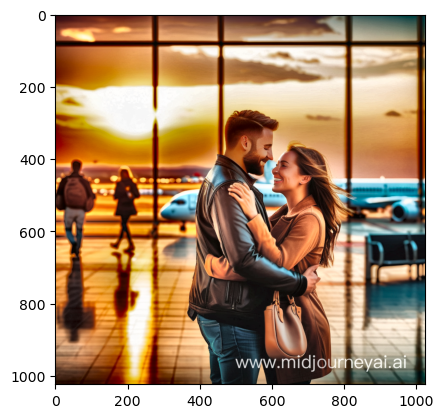

In [27]:
def get_contrast_clahe(img_rgb, thresh):
    # convert image to LAB
    img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

    # clip the channels
    l, a, b = cv2.split(img_lab)

    # create CLAHE object
    clahe = cv2.createCLAHE(clipLimit = thresh, tileGridSize = (8, 8)) #can even change grid size

    # apply clahe on L channel
    l = clahe.apply(l)

    # merge it back
    img_lab = cv2.merge((l,a,b))

    img = cv2.cvtColor(img_lab, cv2.COLOR_LAB2RGB)
    
    return img

img= get_contrast_clahe(img_rgb, 3.0)
plt.imshow(img)

## Method 3: Gamma Correction

Gamma correction adjusts the brightness of the image using a power-law function. It can be used to adjust the overall brightness and contrast of an image.

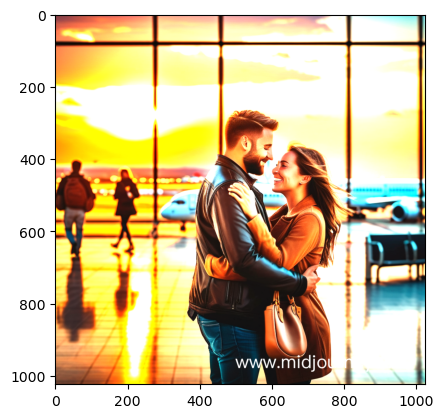

In [34]:
def get_contrast_gamma(img_rgb, gamma):
    # define gama value
    gamma = gamma

    # apply gamma correction
    gamma_img = np.clip(img_rgb ** gamma, 0, 255).astype(np.uint8)
    
    return gamma_img

gama_img= get_contrast_gamma(img_rgb, 1.1)
plt.imshow(gama_img)